In [30]:
from prophet import Prophet

In [31]:
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np
import datetime
import requests
import warnings

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from pmdarima import auto_arima

import prophet

warnings.filterwarnings('ignore')

In [32]:
mat = np.empty((0, 5))
metrics = pd.DataFrame(mat)
metrics = pd.DataFrame(columns=['country', 'model', 'mae', 'mape', 'rsq'])

# Belgium

## train/test split

In [33]:
belgium = pd.read_csv('univariate_df_Belgium.csv')
belgium['date'] = pd.to_datetime(belgium['date'])
belgium = belgium.drop('Unnamed: 0', axis=1)
belgium = belgium.rename(columns={'date': 'ds', 'new_deaths': 'y'})
train_size = int(len(belgium) * 0.7)
belgium_train, belgium_test = belgium[0:train_size], belgium[train_size:]
print(belgium_train.shape, belgium_test.shape)

(141, 2) (61, 2)


## Baseline Prophet

In [34]:
model_baseline = Prophet()
model_baseline.fit(belgium_train)

15:37:33 - cmdstanpy - INFO - Chain [1] start processing
15:37:33 - cmdstanpy - INFO - Chain [1] done processing


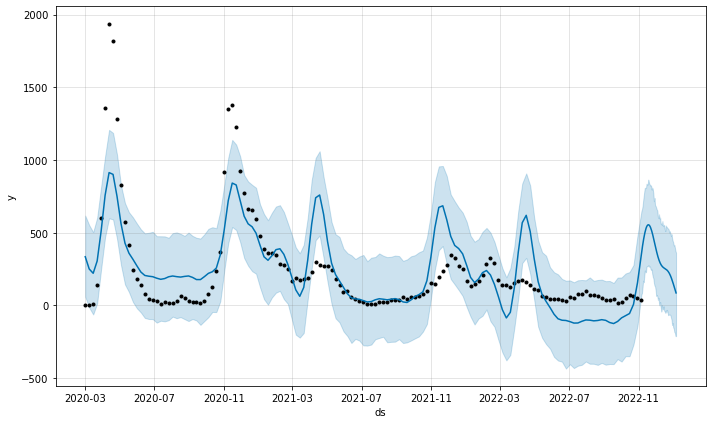

In [35]:
future_baseline = model_baseline.make_future_dataframe(periods=61)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

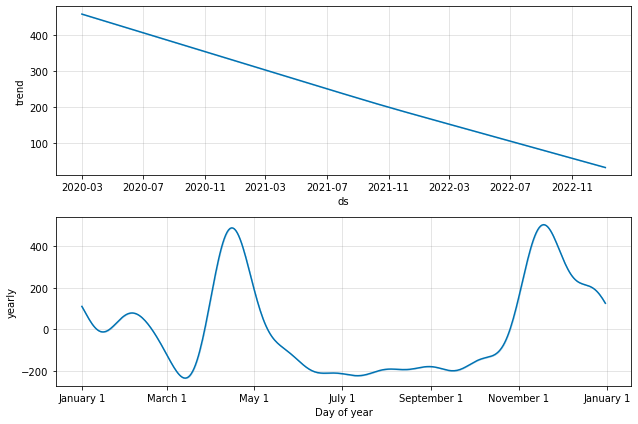

In [36]:
model_baseline.plot_components(forecast_baseline);

In [37]:
performance_baseline = pd.merge(belgium_test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
mape = np.mean(np.abs((performance_baseline['y'] - performance_baseline['yhat']) / (performance_baseline['y'] + 1))) * 100
r2 = r2_score(performance_baseline['y'], performance_baseline['yhat'])
new_row = {'country': 'Belgium', 'model': 'Baseline Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

## Seasonal Prophet

In [38]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_season.fit(belgium_train)

15:37:36 - cmdstanpy - INFO - Chain [1] start processing
15:37:36 - cmdstanpy - INFO - Chain [1] done processing


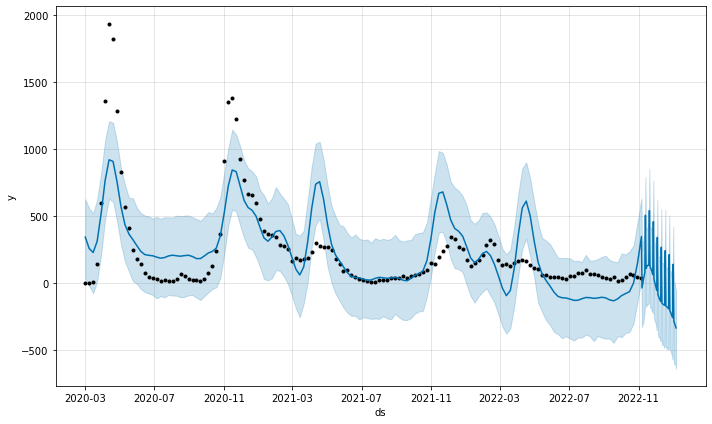

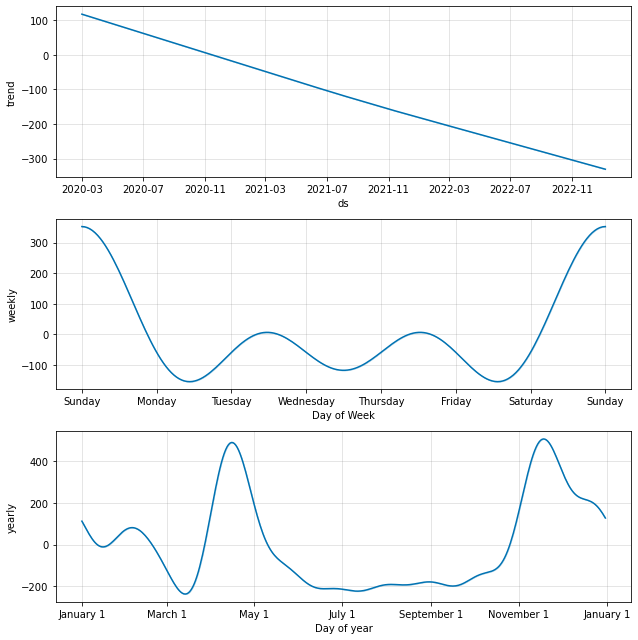

In [39]:
future_season = model_season.make_future_dataframe(periods=61)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season); 

model_season.plot_components(forecast_season);

In [40]:
performance_season = pd.merge(belgium_test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_season['y'], performance_season['yhat'])
mape = np.mean(np.abs((performance_season['y'] - performance_season['yhat']) / (performance_season['y'] + 1))) * 100
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'Belgium', 'model': 'Seasonal Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# Chile

## train/test split

In [41]:
chile = pd.read_csv('univariate_df_Chile.csv')
chile['date'] = pd.to_datetime(chile['date'])
chile = chile.drop('Unnamed: 0', axis=1)
chile = chile.rename(columns={'date': 'ds', 'new_deaths': 'y'})
train_size = int(len(chile) * 0.7)
chile_train, chile_test = chile[0:train_size], chile[train_size:]
print(chile_train.shape, chile_test.shape)

(141, 2) (61, 2)


## Baseline Prophet

15:37:39 - cmdstanpy - INFO - Chain [1] start processing
15:37:39 - cmdstanpy - INFO - Chain [1] done processing


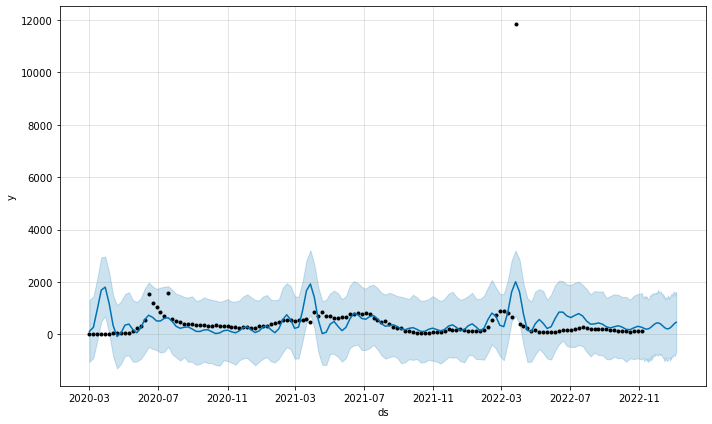

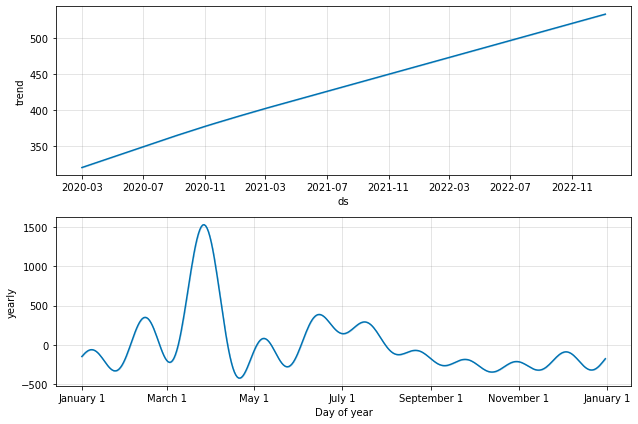

In [42]:
model_baseline = Prophet()
model_baseline.fit(chile_train)
future_baseline = model_baseline.make_future_dataframe(periods=61)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 
model_baseline.plot_components(forecast_baseline);

In [43]:
performance_baseline = pd.merge(chile_test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
mape = np.mean(np.abs((performance_baseline['y'] - performance_baseline['yhat']) / (performance_baseline['y'] + 1))) * 100
r2 = r2_score(performance_baseline['y'], performance_baseline['yhat'])
new_row = {'country': 'Chile', 'model': 'Baseline Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

## Seasonal Prophet

15:37:41 - cmdstanpy - INFO - Chain [1] start processing
15:37:41 - cmdstanpy - INFO - Chain [1] done processing


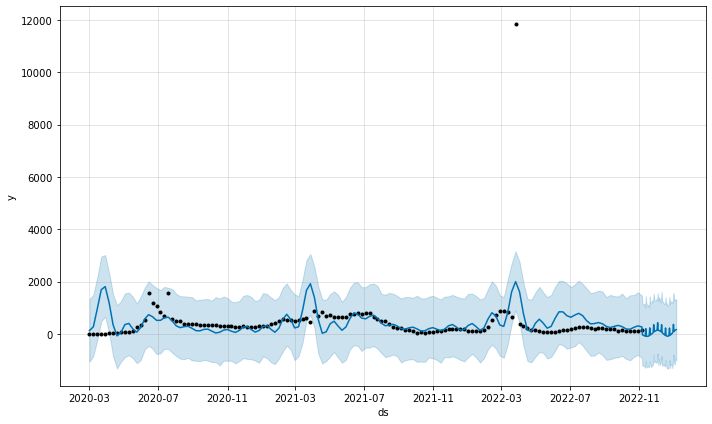

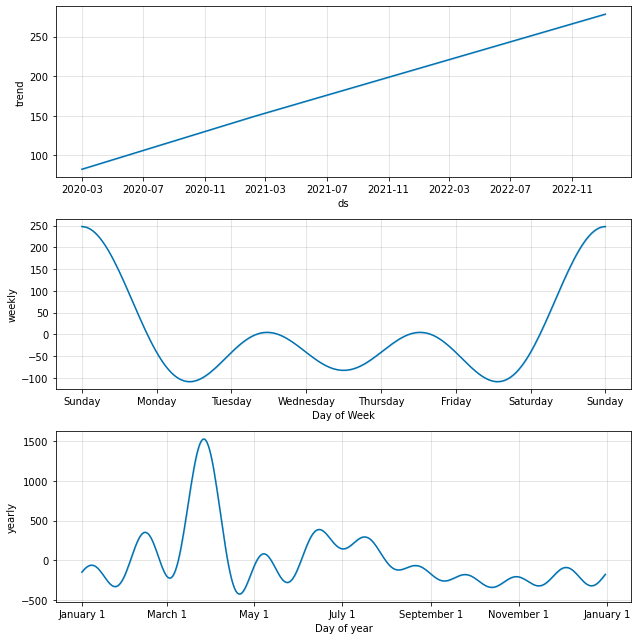

In [44]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_season.fit(chile_train)
future_season = model_season.make_future_dataframe(periods=61)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season); 

model_season.plot_components(forecast_season);

In [45]:
performance_season = pd.merge(chile_test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_season['y'], performance_season['yhat'])
mape = np.mean(np.abs((performance_season['y'] - performance_season['yhat']) / (performance_season['y'] + 1))) * 100
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'Chile', 'model': 'Seasonal Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# Ireland

## train/test split

In [46]:
ireland = pd.read_csv('univariate_df_Ireland.csv')
ireland['date'] = pd.to_datetime(ireland['date'])
ireland = ireland.drop('Unnamed: 0', axis=1)
ireland = ireland.rename(columns={'date': 'ds', 'new_deaths': 'y'})
train_size = int(len(ireland) * 0.7)
ireland_train, ireland_test = ireland[0:train_size], ireland[train_size:]
print(ireland_train.shape, ireland_test.shape)

(141, 2) (61, 2)


## Baseline Prophet

15:37:44 - cmdstanpy - INFO - Chain [1] start processing
15:37:44 - cmdstanpy - INFO - Chain [1] done processing


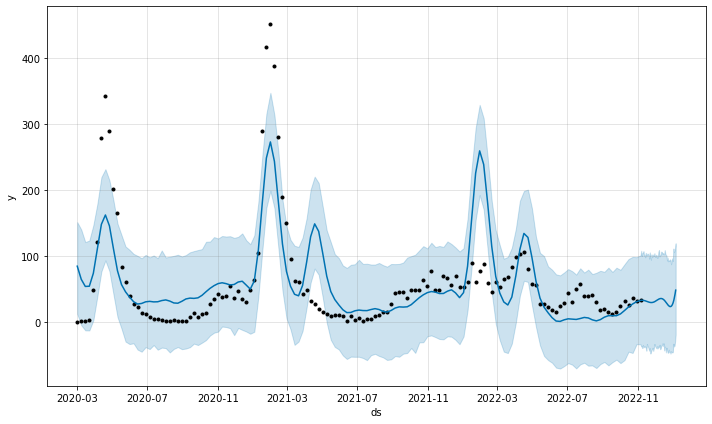

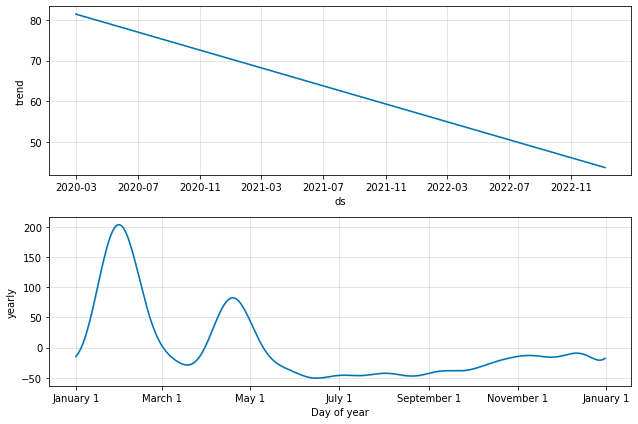

In [47]:
model_baseline = Prophet()
model_baseline.fit(ireland_train)
future_baseline = model_baseline.make_future_dataframe(periods=61)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 
model_baseline.plot_components(forecast_baseline);

In [48]:
performance_baseline = pd.merge(ireland_test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
mape = np.mean(np.abs((performance_baseline['y'] - performance_baseline['yhat']) / (performance_baseline['y'] + 1))) * 100
r2 = r2_score(performance_baseline['y'], performance_baseline['yhat'])
new_row = {'country': 'Ireland', 'model': 'Baseline Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

## Seasonal Prophet

15:37:46 - cmdstanpy - INFO - Chain [1] start processing
15:37:46 - cmdstanpy - INFO - Chain [1] done processing


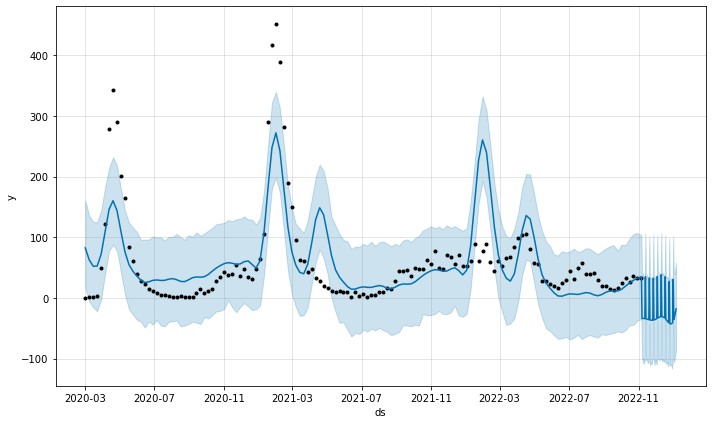

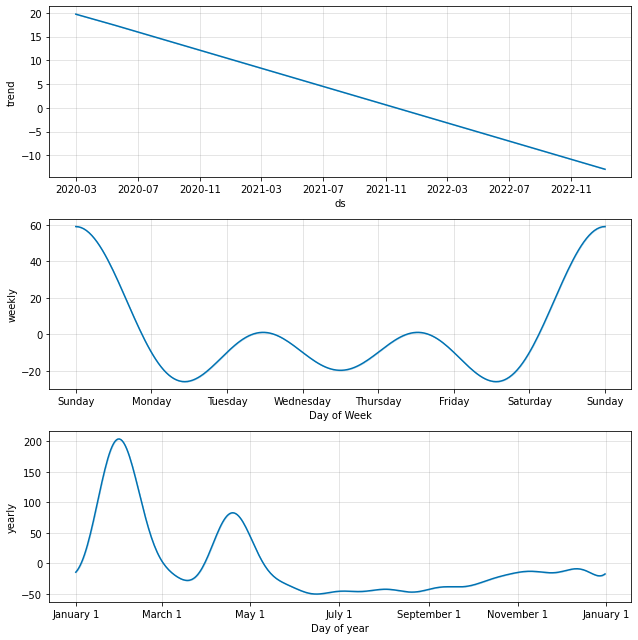

In [49]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_season.fit(ireland_train)
future_season = model_season.make_future_dataframe(periods=61)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season); 

model_season.plot_components(forecast_season);

In [50]:
performance_season = pd.merge(ireland_test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_season['y'], performance_season['yhat'])
mape = np.mean(np.abs((performance_season['y'] - performance_season['yhat']) / (performance_season['y'] + 1))) * 100
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'Ireland', 'model': 'Seasonal Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# Israel

## train/test split

In [51]:
israel = pd.read_csv('univariate_df_Israel.csv')
israel['date'] = pd.to_datetime(israel['date'])
israel = israel.drop('Unnamed: 0', axis=1)
israel = israel.rename(columns={'date': 'ds', 'new_deaths': 'y'})
train_size = int(len(israel) * 0.7)
israel_train, israel_test = israel[0:train_size], israel[train_size:]
print(israel_train.shape, israel_test.shape)

(141, 2) (61, 2)


## Baseline Prophet

15:37:48 - cmdstanpy - INFO - Chain [1] start processing
15:37:49 - cmdstanpy - INFO - Chain [1] done processing


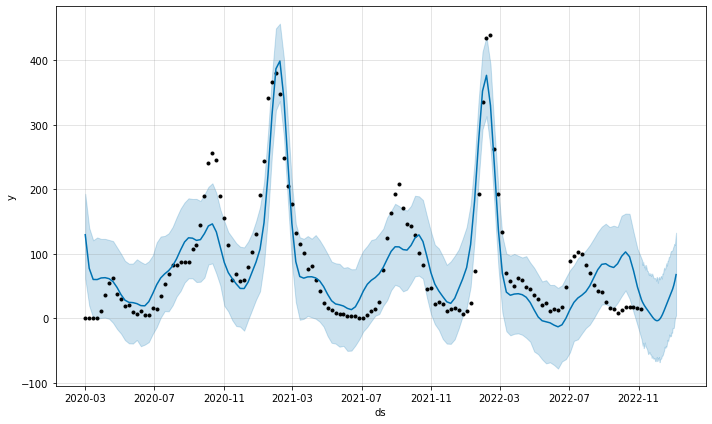

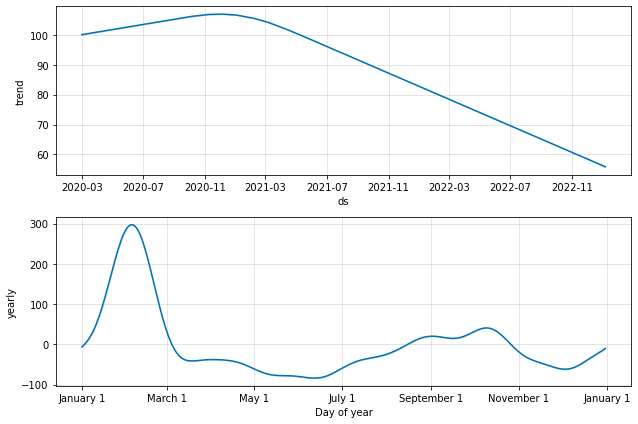

In [52]:
model_baseline = Prophet()
model_baseline.fit(israel_train)
future_baseline = model_baseline.make_future_dataframe(periods=61)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 
model_baseline.plot_components(forecast_baseline);

In [53]:
performance_baseline = pd.merge(israel_test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
mape = np.mean(np.abs((performance_baseline['y'] - performance_baseline['yhat']) / (performance_baseline['y'] + 1))) * 100
r2 = r2_score(performance_baseline['y'], performance_baseline['yhat'])
new_row = {'country': 'Israel', 'model': 'Baseline Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

## Seasonal Prophet

15:37:50 - cmdstanpy - INFO - Chain [1] start processing
15:37:50 - cmdstanpy - INFO - Chain [1] done processing


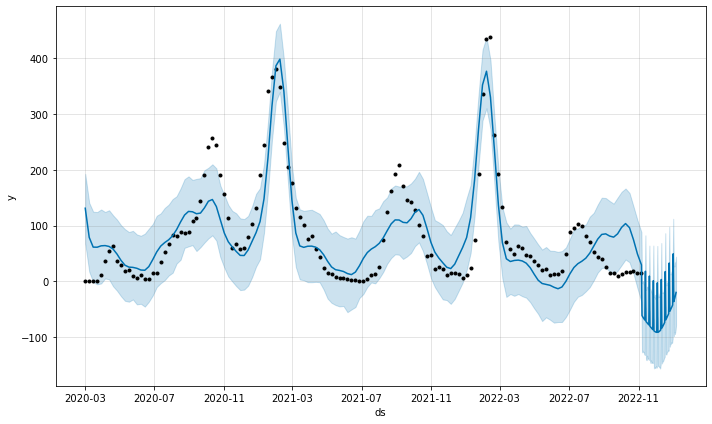

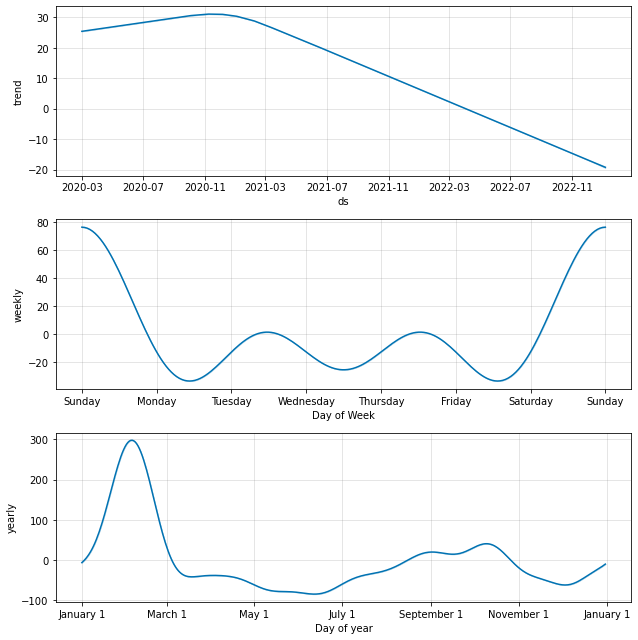

In [54]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_season.fit(israel_train)
future_season = model_season.make_future_dataframe(periods=61)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season); 

model_season.plot_components(forecast_season);

In [55]:
performance_season = pd.merge(israel_test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_season['y'], performance_season['yhat'])
mape = np.mean(np.abs((performance_season['y'] - performance_season['yhat']) / (performance_season['y'] + 1))) * 100
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'Israel', 'model': 'Seasonal Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# Italy

## train/test split

In [56]:
italy = pd.read_csv('univariate_df_Italy.csv')
italy['date'] = pd.to_datetime(italy['date'])
italy = italy.drop('Unnamed: 0', axis=1)
italy = italy.rename(columns={'date': 'ds', 'new_deaths': 'y'})
train_size = int(len(italy) * 0.7)
italy_train, italy_test = italy[0:train_size], italy[train_size:]
print(italy_train.shape, italy_test.shape)

(141, 2) (61, 2)


## Baseline Prophet

15:37:53 - cmdstanpy - INFO - Chain [1] start processing
15:37:53 - cmdstanpy - INFO - Chain [1] done processing


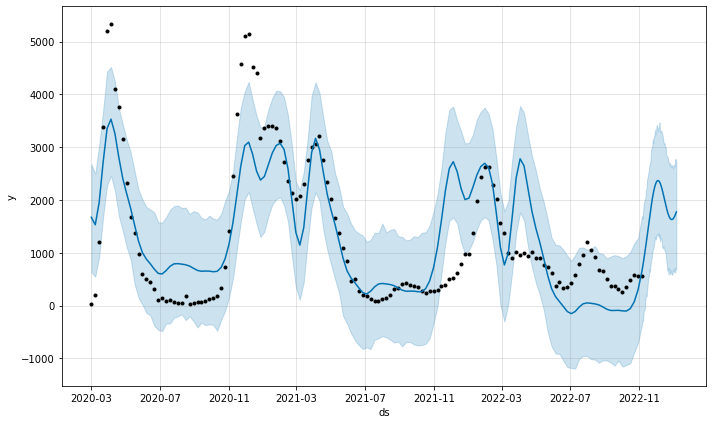

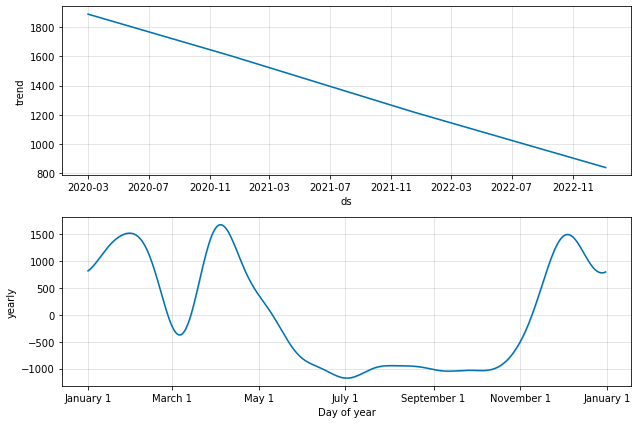

In [57]:
model_baseline = Prophet()
model_baseline.fit(italy_train)
future_baseline = model_baseline.make_future_dataframe(periods=61)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 
model_baseline.plot_components(forecast_baseline);

In [58]:
performance_baseline = pd.merge(italy_test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
mape = np.mean(np.abs((performance_baseline['y'] - performance_baseline['yhat']) / (performance_baseline['y'] + 1))) * 100
r2 = r2_score(performance_baseline['y'], performance_baseline['yhat'])
new_row = {'country': 'Italy', 'model': 'Baseline Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

## Seasonal Prophet

15:37:55 - cmdstanpy - INFO - Chain [1] start processing


15:37:55 - cmdstanpy - INFO - Chain [1] done processing


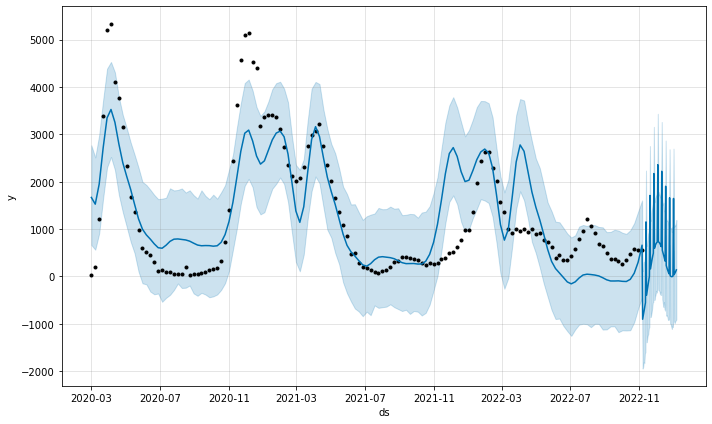

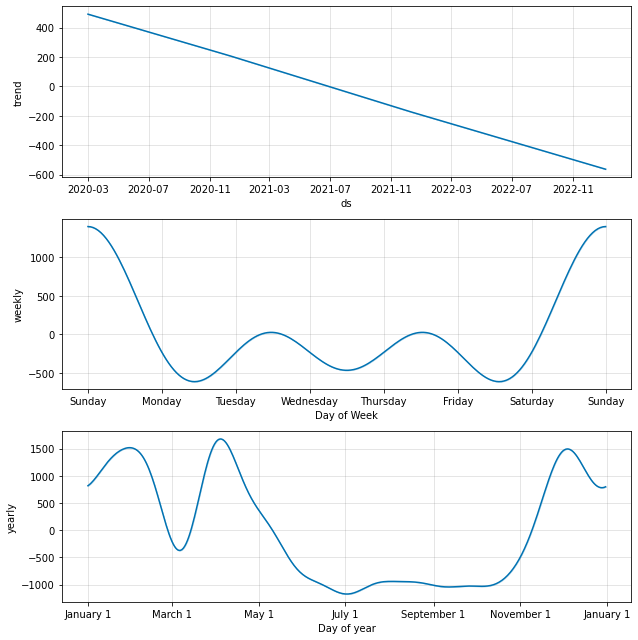

In [59]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_season.fit(italy_train)
future_season = model_season.make_future_dataframe(periods=61)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season); 

model_season.plot_components(forecast_season);

In [60]:
performance_season = pd.merge(italy_test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_season['y'], performance_season['yhat'])
mape = np.mean(np.abs((performance_season['y'] - performance_season['yhat']) / (performance_season['y'] + 1))) * 100
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'Italy', 'model': 'Seasonal Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# United States

## train/test split

In [61]:
us = pd.read_csv('univariate_df_United_States.csv')
us['date'] = pd.to_datetime(us['date'])
us = us.drop('Unnamed: 0', axis=1)
us = us.rename(columns={'date': 'ds', 'new_deaths': 'y'})
train_size = int(len(us) * 0.7)
us_train, us_test = us[0:train_size], us[train_size:]
print(us_train.shape, us_test.shape)

(141, 3) (61, 3)


## Baseline Prophet

15:37:57 - cmdstanpy - INFO - Chain [1] start processing
15:37:57 - cmdstanpy - INFO - Chain [1] done processing


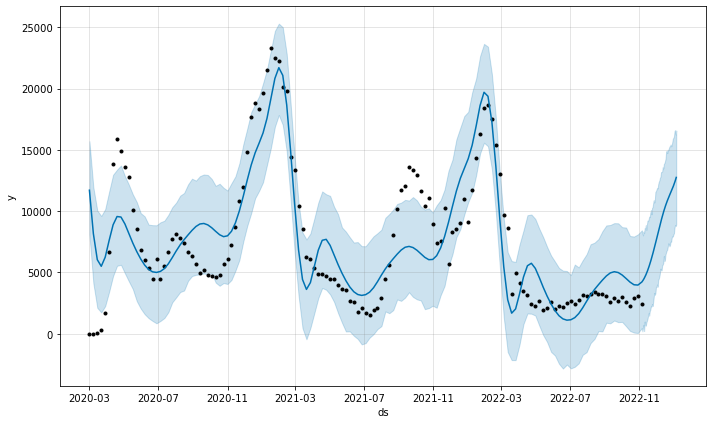

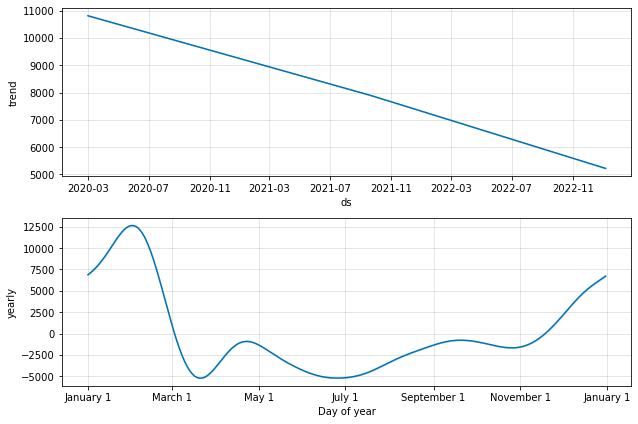

In [62]:
model_baseline = Prophet()
model_baseline.fit(us_train)
future_baseline = model_baseline.make_future_dataframe(periods=61)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 
model_baseline.plot_components(forecast_baseline);

In [63]:
performance_baseline = pd.merge(us_test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
mape = np.mean(np.abs((performance_baseline['y'] - performance_baseline['yhat']) / (performance_baseline['y'] + 1))) * 100
r2 = r2_score(performance_baseline['y'], performance_baseline['yhat'])
new_row = {'country': 'US', 'model': 'Baseline Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

## Seasonal Prophet

15:38:00 - cmdstanpy - INFO - Chain [1] start processing
15:38:00 - cmdstanpy - INFO - Chain [1] done processing


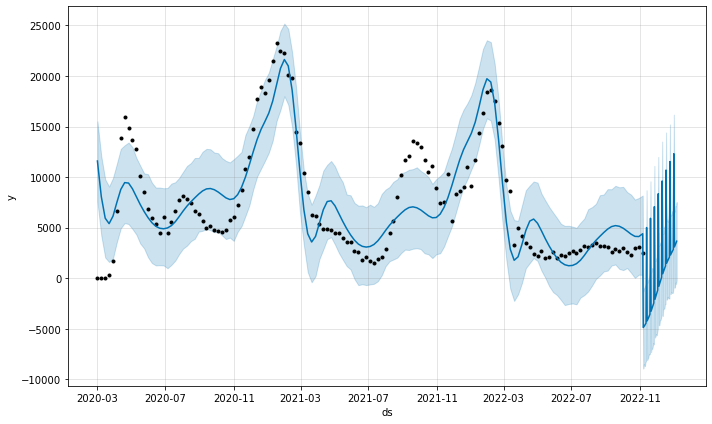

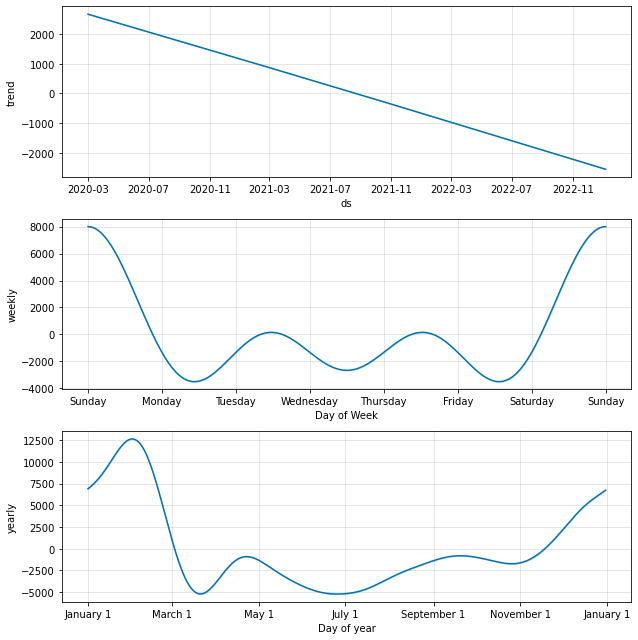

In [64]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_season.fit(us_train)
future_season = model_season.make_future_dataframe(periods=61)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season); 

model_season.plot_components(forecast_season);

In [65]:
performance_season = pd.merge(us_test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_season['y'], performance_season['yhat'])
mape = np.mean(np.abs((performance_season['y'] - performance_season['yhat']) / (performance_season['y'] + 1))) * 100
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'US', 'model': 'Seasonal Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# Czechia

## train/test split

In [66]:
czechia = pd.read_csv('univariate_df_Czechia.csv')
czechia['date'] = pd.to_datetime(czechia['date'])
czechia = czechia.drop('Unnamed: 0', axis=1)
czechia = czechia.rename(columns={'date': 'ds', 'new_deaths': 'y'})
train_size = int(len(czechia) * 0.7)
czechia_train, czechia_test = czechia[0:train_size], czechia[train_size:]
print(czechia_train.shape, czechia_test.shape)

(141, 3) (61, 3)


## Baseline Prophet

15:38:03 - cmdstanpy - INFO - Chain [1] start processing
15:38:03 - cmdstanpy - INFO - Chain [1] done processing


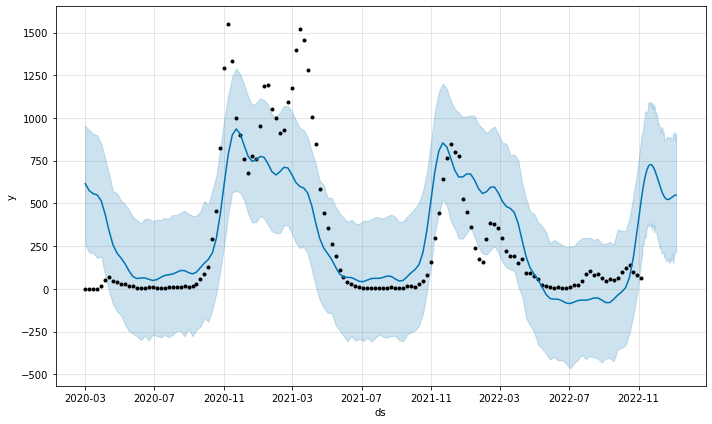

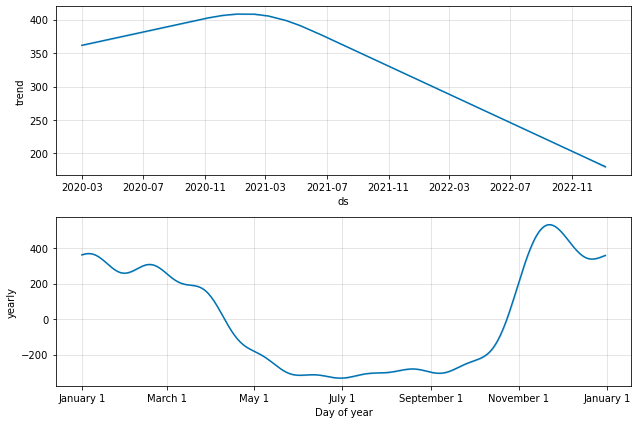

In [67]:
model_baseline = Prophet()
model_baseline.fit(czechia_train)
future_baseline = model_baseline.make_future_dataframe(periods=61)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 
model_baseline.plot_components(forecast_baseline);

In [68]:
performance_baseline = pd.merge(czechia_test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
mape = np.mean(np.abs((performance_baseline['y'] - performance_baseline['yhat']) / (performance_baseline['y'] + 1))) * 100
r2 = r2_score(performance_baseline['y'], performance_baseline['yhat'])
new_row = {'country': 'Czechia', 'model': 'Baseline Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

## Seasonal Prophet

15:38:05 - cmdstanpy - INFO - Chain [1] start processing
15:38:05 - cmdstanpy - INFO - Chain [1] done processing


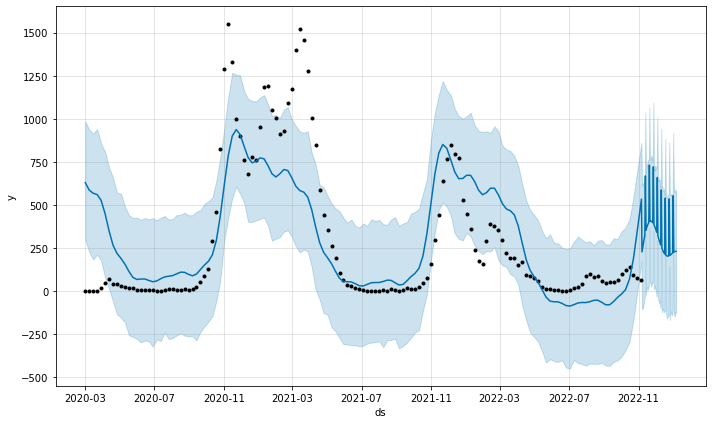

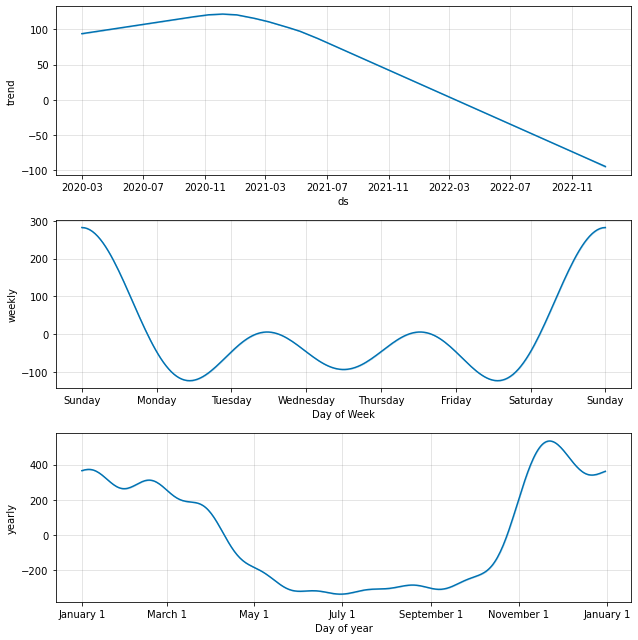

In [69]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_season.fit(czechia_train)
future_season = model_season.make_future_dataframe(periods=61)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season); 

model_season.plot_components(forecast_season);

In [70]:
performance_season = pd.merge(czechia_test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_season['y'], performance_season['yhat'])
mape = np.mean(np.abs((performance_season['y'] - performance_season['yhat']) / (performance_season['y'] + 1))) * 100
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'Czechia', 'model': 'Seasonal Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# Estonia

## train/test split

In [71]:
estonia = pd.read_csv('univariate_df_Estonia.csv')
estonia['date'] = pd.to_datetime(estonia['date'])
estonia = estonia.drop('Unnamed: 0', axis=1)
estonia = estonia.rename(columns={'date': 'ds', 'new_deaths': 'y'})
train_size = int(len(estonia) * 0.7)
estonia_train, estonia_test = estonia[0:train_size], estonia[train_size:]
print(estonia_train.shape, estonia_test.shape)

(141, 3) (61, 3)


## Baseline Prophet

15:38:08 - cmdstanpy - INFO - Chain [1] start processing
15:38:08 - cmdstanpy - INFO - Chain [1] done processing


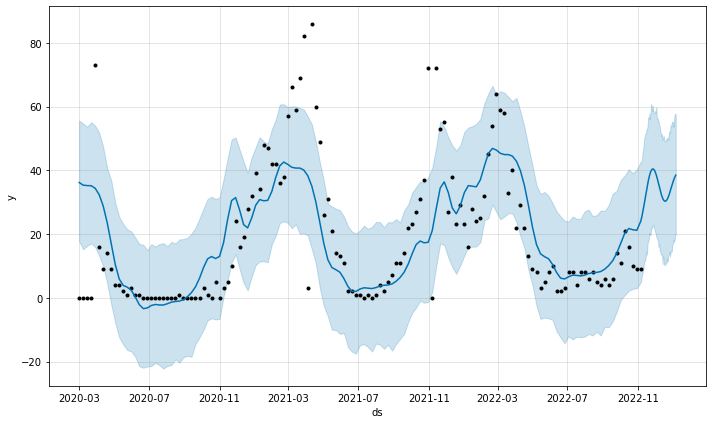

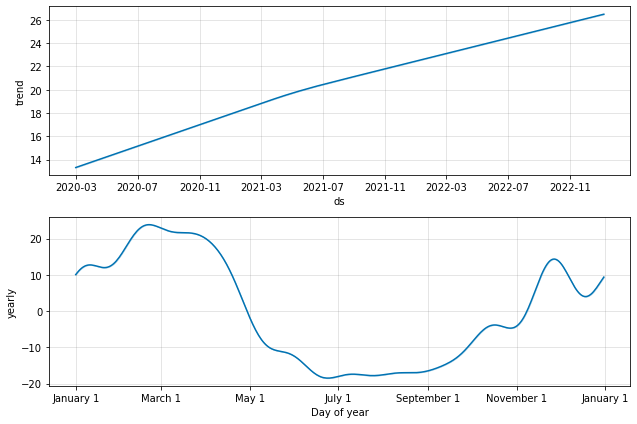

In [72]:
model_baseline = Prophet()
model_baseline.fit(estonia_train)
future_baseline = model_baseline.make_future_dataframe(periods=61)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 
model_baseline.plot_components(forecast_baseline);

In [73]:
performance_baseline = pd.merge(estonia_test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
mape = np.mean(np.abs((performance_baseline['y'] - performance_baseline['yhat']) / (performance_baseline['y'] + 1))) * 100
r2 = r2_score(performance_baseline['y'], performance_baseline['yhat'])
new_row = {'country': 'Estonia', 'model': 'Baseline Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

## Seasonal Prophet

15:38:10 - cmdstanpy - INFO - Chain [1] start processing
15:38:10 - cmdstanpy - INFO - Chain [1] done processing


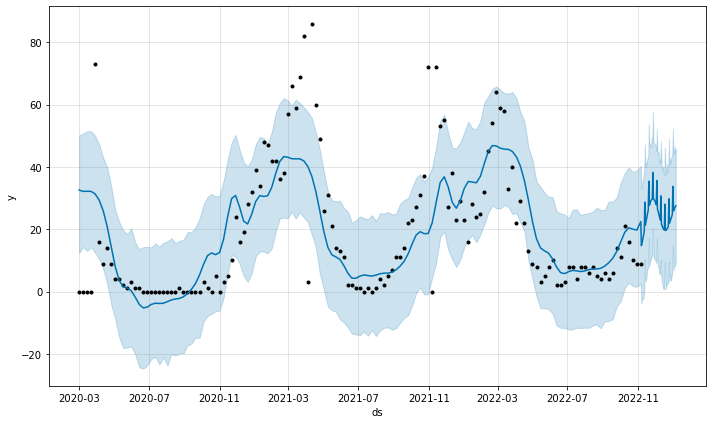

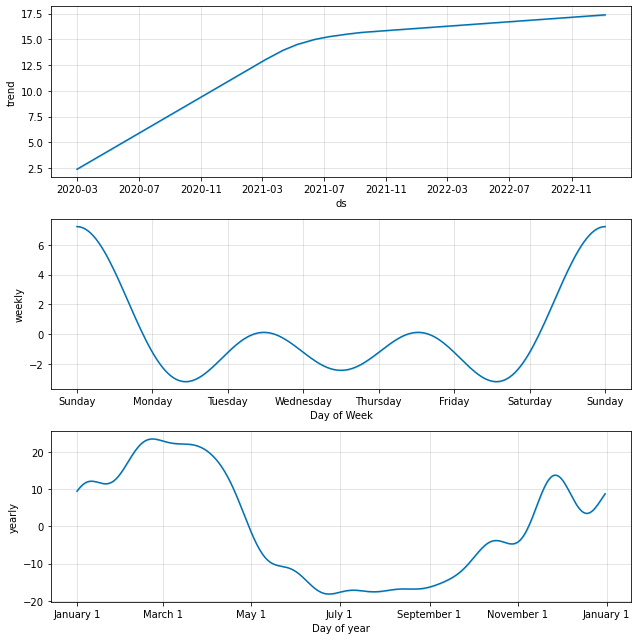

In [74]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_season.fit(estonia_train)
future_season = model_season.make_future_dataframe(periods=61)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season); 

model_season.plot_components(forecast_season);

In [75]:
performance_season = pd.merge(estonia_test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_season['y'], performance_season['yhat'])
mape = np.mean(np.abs((performance_season['y'] - performance_season['yhat']) / (performance_season['y'] + 1))) * 100
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'Estonia', 'model': 'Seasonal Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# France

## train/test split

In [76]:
france = pd.read_csv('univariate_df_France.csv')
france['date'] = pd.to_datetime(france['date'])
france = france.drop('Unnamed: 0', axis=1)
france = france.rename(columns={'date': 'ds', 'new_deaths': 'y'})
train_size = int(len(france) * 0.7)
france_train, france_test = france[0:train_size], france[train_size:]
print(france_train.shape, france_test.shape)

(141, 3) (61, 3)


## Baseline Prophet

15:38:12 - cmdstanpy - INFO - Chain [1] start processing
15:38:12 - cmdstanpy - INFO - Chain [1] done processing


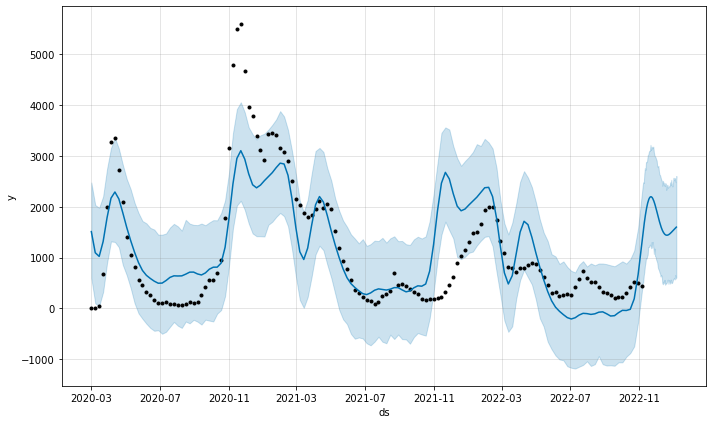

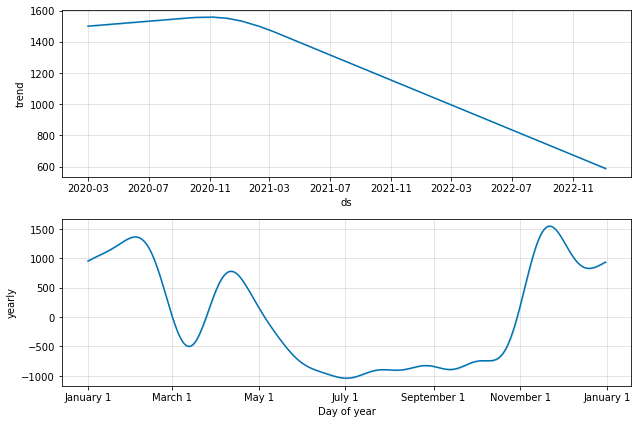

In [77]:
model_baseline = Prophet()
model_baseline.fit(france_train)
future_baseline = model_baseline.make_future_dataframe(periods=61)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 
model_baseline.plot_components(forecast_baseline);

In [78]:
performance_baseline = pd.merge(france_test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
mape = np.mean(np.abs((performance_baseline['y'] - performance_baseline['yhat']) / (performance_baseline['y'] + 1))) * 100
r2 = r2_score(performance_baseline['y'], performance_baseline['yhat'])
new_row = {'country': 'France', 'model': 'Baseline Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

## Seasonal Prophet

15:38:14 - cmdstanpy - INFO - Chain [1] start processing
15:38:14 - cmdstanpy - INFO - Chain [1] done processing


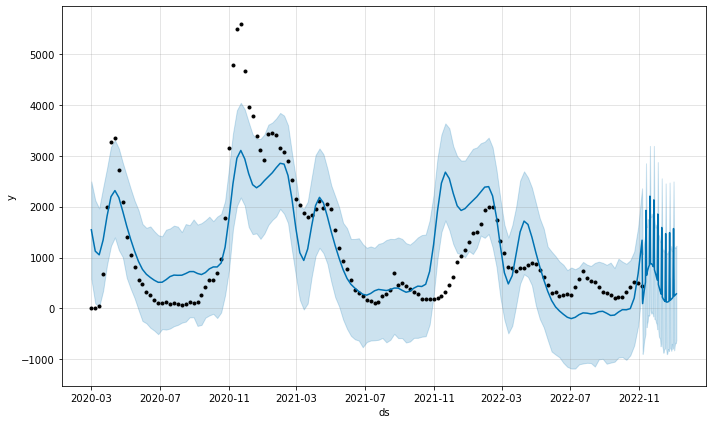

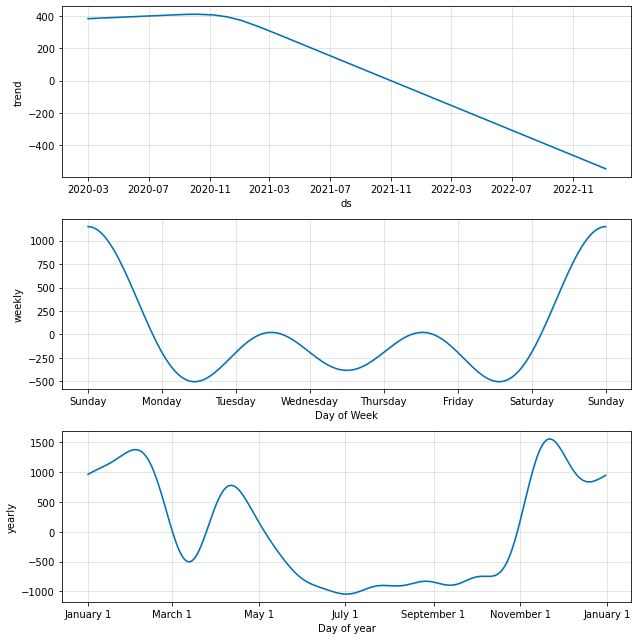

In [79]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_season.fit(france_train)
future_season = model_season.make_future_dataframe(periods=61)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season); 

model_season.plot_components(forecast_season);

In [80]:
performance_season = pd.merge(france_test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_season['y'], performance_season['yhat'])
mape = np.mean(np.abs((performance_season['y'] - performance_season['yhat']) / (performance_season['y'] + 1))) * 100
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'France', 'model': 'Seasonal Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# Malaysia

## train/test split

In [81]:
malaysia = pd.read_csv('univariate_df_Malaysia.csv')
malaysia['date'] = pd.to_datetime(malaysia['date'])
malaysia = malaysia.drop('Unnamed: 0', axis=1)
malaysia = malaysia.rename(columns={'date': 'ds', 'new_deaths': 'y'})
train_size = int(len(malaysia) * 0.7)
malaysia_train, malaysia_test = malaysia[0:train_size], malaysia[train_size:]
print(malaysia_train.shape, malaysia_test.shape)

(141, 3) (61, 3)


## Baseline Prophet

15:38:17 - cmdstanpy - INFO - Chain [1] start processing
15:38:17 - cmdstanpy - INFO - Chain [1] done processing


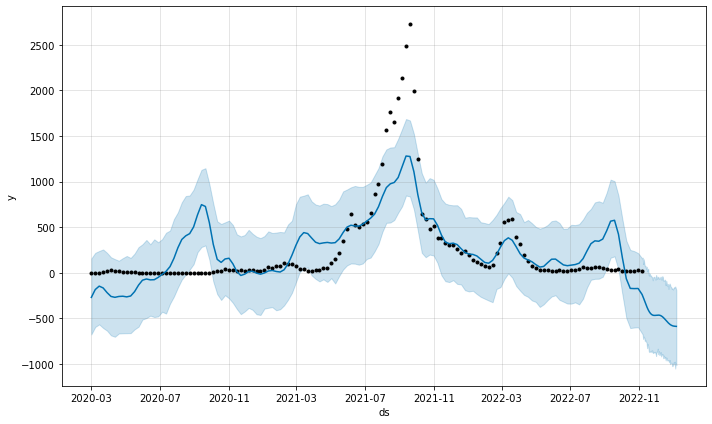

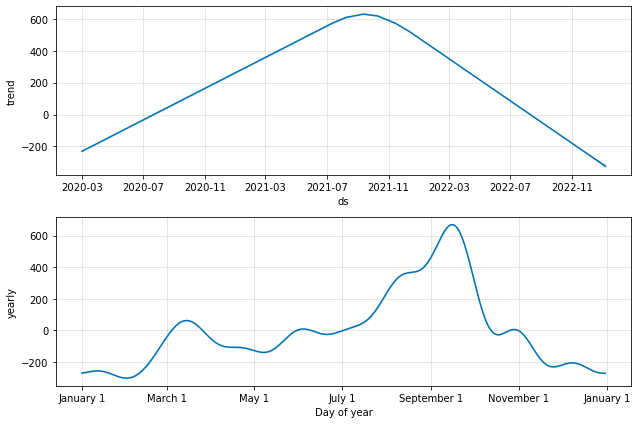

In [82]:
model_baseline = Prophet()
model_baseline.fit(malaysia_train)
future_baseline = model_baseline.make_future_dataframe(periods=61)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 
model_baseline.plot_components(forecast_baseline);

In [83]:
performance_baseline = pd.merge(malaysia_test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
mape = np.mean(np.abs((performance_baseline['y'] - performance_baseline['yhat']) / (performance_baseline['y'] + 1))) * 100
r2 = r2_score(performance_baseline['y'], performance_baseline['yhat'])
new_row = {'country': 'Malaysia', 'model': 'Baseline Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

## Seasonal Prophet

15:38:18 - cmdstanpy - INFO - Chain [1] start processing
15:38:19 - cmdstanpy - INFO - Chain [1] done processing


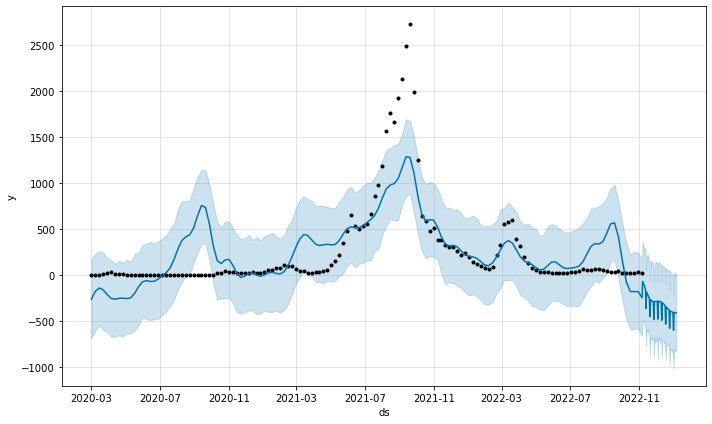

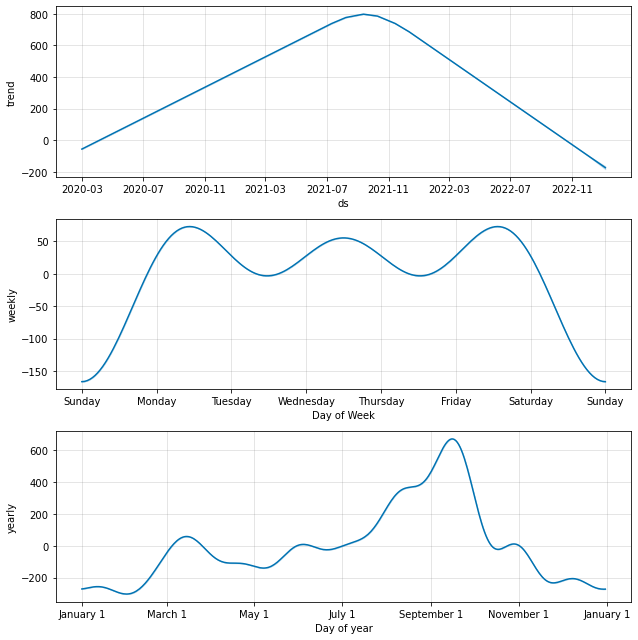

In [84]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_season.fit(malaysia_train)
future_season = model_season.make_future_dataframe(periods=61)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season); 

model_season.plot_components(forecast_season);

In [85]:
performance_season = pd.merge(malaysia_test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_season['y'], performance_season['yhat'])
mape = np.mean(np.abs((performance_season['y'] - performance_season['yhat']) / (performance_season['y'] + 1))) * 100
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'Malaysia', 'model': 'Seasonal Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# Multivariate Prophet

In [86]:
multivar = pd.read_csv('multivar.csv')
multivar['date'] = pd.to_datetime(multivar['date'])
multivar = multivar.drop('Unnamed: 0', axis=1)
multivar = multivar.rename(columns={'date': 'ds', 'new_deaths': 'y'})

In [87]:
# checking for NAs
print(multivar['new_deaths_2_week_mean'].isna().sum())
val = multivar[multivar['new_deaths_2_week_mean'].isna()]
print(val[['ds', 'location']])

print(multivar['new_deaths_2_week_max'].isna().sum())
val = multivar[multivar['new_deaths_2_week_max'].isna()]
print(val[['ds', 'location']])

print(multivar['new_deaths_2_week_min'].isna().sum())
val = multivar[multivar['new_deaths_2_week_min'].isna()]
print(val[['ds', 'location']])

print(multivar['new_deaths_1_week_lag'].isna().sum())
val = multivar[multivar['new_deaths_1_week_lag'].isna()]
print(val[['ds', 'location']])

print(multivar['new_deaths_4_week_mean'].isna().sum())
val = multivar[multivar['new_deaths_4_week_mean'].isna()]
print(val[['ds', 'location']])

1
          ds location
0 2020-03-01  Belgium
1
          ds location
0 2020-03-01  Belgium
1
          ds location
0 2020-03-01  Belgium
1
          ds location
0 2020-03-01  Belgium
3
          ds location
0 2020-03-01  Belgium
1 2020-03-08  Belgium
2 2020-03-15  Belgium


In [88]:
# checking for NAs
print(multivar['new_deaths_4_week_max'].isna().sum())
val = multivar[multivar['new_deaths_4_week_max'].isna()]
print(val[['ds', 'location']])

print(multivar['new_deaths_4_week_min'].isna().sum())
val = multivar[multivar['new_deaths_4_week_min'].isna()]
print(val[['ds', 'location']])

print(multivar['new_deaths_2_week_lag'].isna().sum())
val = multivar[multivar['new_deaths_2_week_lag'].isna()]
print(val[['ds', 'location']])

print(multivar['new_deaths_4_week_lag'].isna().sum())
val = multivar[multivar['new_deaths_4_week_lag'].isna()]
print(val[['ds', 'location']])

print(multivar['new_deaths_4_week_std'].isna().sum())
val = multivar[multivar['new_deaths_4_week_std'].isna()]
print(val[['ds', 'location']])

3
          ds location
0 2020-03-01  Belgium
1 2020-03-08  Belgium
2 2020-03-15  Belgium
3
          ds location
0 2020-03-01  Belgium
1 2020-03-08  Belgium
2 2020-03-15  Belgium
2
          ds location
0 2020-03-01  Belgium
1 2020-03-08  Belgium
4
          ds location
0 2020-03-01  Belgium
1 2020-03-08  Belgium
2 2020-03-15  Belgium
3 2020-03-22  Belgium
3
          ds location
0 2020-03-01  Belgium
1 2020-03-08  Belgium
2 2020-03-15  Belgium


In [89]:
# removing NA rows
rows_to_remove = [
    ('2020-03-01', 'Belgium'),
    ('2020-03-08', 'Belgium'),
    ('2020-03-15', 'Belgium'),
    ('2020-03-22', 'Belgium')
]
multivar = multivar[~((multivar['ds'].isin([v[0] for v in rows_to_remove])) & (multivar['location'].isin([v[1] for v in rows_to_remove])))]

In [90]:
multivar = pd.get_dummies(multivar)
multivar

,ds,total_cases,new_cases,y,total_cases_per_million,new_cases_per_million,icu_patients_per_million,hosp_patients_per_million,weekly_icu_admissions_per_million,weekly_hosp_admissions_per_million,...,location_Israel,location_Italy,location_Malaysia,location_United States,tests_units_people tested,tests_units_tests performed,season_Autumn,season_Spring,season_Summer,season_Winter
4,2020-03-29,12031.0,7558.0,602.0,1032.179,648.426,82.447,389.158,NaN,300.191,...,0,0,0,0,0,1,0,1,0,0
5,2020-04-05,21665.0,9634.0,1357.0,1858.712,826.533,108.700,482.158,NaN,306.368,...,0,0,0,0,0,1,0,1,0,0
6,2020-04-12,32874.0,11209.0,1938.0,2820.369,961.657,107.499,475.466,NaN,242.795,...,0,0,0,0,0,1,0,1,0,0
7,2020-04-19,41225.0,8351.0,1820.0,3536.828,716.460,91.885,423.819,NaN,165.152,...,0,0,0,0,0,1,0,1,0,0
8,2020-04-26,47500.0,6275.0,1285.0,4075.181,538.353,77.471,340.428,NaN,121.826,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,2023-12-10,103436829.0,NaN,1614.0,305763.910,NaN,7.168,58.512,NaN,70.395,...,0,0,0,1,0,0,0,0,0,1
2019,2023-12-17,103436829.0,NaN,1450.0,305763.910,NaN,7.325,62.390,NaN,75.678,...,0,0,0,1,0,0,0,0,0,1
2020,2023-12-24,103436829.0,NaN,1263.0,305763.910,NaN,8.546,68.988,NaN,89.101,...,0,0,0,1,0,0,0,0,0,1
2021,2023-12-31,103436829.0,NaN,839.0,305763.910,NaN,9.909,86.727,NaN,106.022,...,0,0,0,1,0,0,0,0,0,1


In [91]:
train_size = int(len(multivar) * 0.7)
multivar_train, multivar_test = multivar[0:train_size], multivar[train_size:]
print(multivar_train.shape, multivar_test.shape)

(1413, 78) (606, 78)


In [92]:
model_multivariate = Prophet(yearly_seasonality=True, weekly_seasonality=True)

model_multivariate.add_regressor('new_deaths_2_week_mean', standardize=False)
model_multivariate.add_regressor('new_deaths_2_week_max', standardize=False)
model_multivariate.add_regressor('new_deaths_2_week_min', standardize=False)
model_multivariate.add_regressor('new_deaths_1_week_lag', standardize=False)
model_multivariate.add_regressor('new_deaths_4_week_mean', standardize=False)
model_multivariate.add_regressor('new_deaths_4_week_max', standardize=False)
model_multivariate.add_regressor('new_deaths_4_week_min', standardize=False)
model_multivariate.add_regressor('new_deaths_2_week_lag', standardize=False)
model_multivariate.add_regressor('new_deaths_4_week_lag', standardize=False)
model_multivariate.add_regressor('new_deaths_4_week_std', standardize=False)

model_multivariate.fit(multivar_train)

15:38:22 - cmdstanpy - INFO - Chain [1] start processing


15:38:28 - cmdstanpy - INFO - Chain [1] done processing


In [93]:
future_multivariate = model_multivariate.make_future_dataframe(periods=606)
future_multivariate = pd.merge(future_multivariate, multivar[['ds',
                                                              'new_deaths_2_week_mean',
                                                              'new_deaths_2_week_max',
                                                              'new_deaths_2_week_min',
                                                              'new_deaths_1_week_lag',
                                                              'new_deaths_4_week_mean',
                                                              'new_deaths_4_week_max',
                                                              'new_deaths_4_week_min',
                                                              'new_deaths_2_week_lag',
                                                              'new_deaths_4_week_lag',
                                                              'new_deaths_4_week_std']], on='ds', how='inner')

future_multivariate = future_multivariate.fillna(method='ffill')
future_multivariate.tail(10)

,ds,new_deaths_2_week_mean,new_deaths_2_week_max,new_deaths_2_week_min,new_deaths_1_week_lag,new_deaths_4_week_mean,new_deaths_4_week_max,new_deaths_4_week_min,new_deaths_2_week_lag,new_deaths_4_week_lag,new_deaths_4_week_std
2009,2024-01-07,0.0,0.0,0.0,0.0,3.75,15.0,0.0,0.0,15.0,7.500000
2010,2024-01-07,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000020
2011,2024-01-07,0.5,1.0,0.0,1.0,2.50,5.0,0.0,5.0,5.0,2.380476
2012,2024-01-07,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000020
2013,2024-01-07,8.0,16.0,0.0,16.0,158.00,388.0,0.0,228.0,382.0,185.227788
2014,2024-01-07,12.5,25.0,0.0,25.0,18.75,28.0,0.0,22.0,11.0,12.737739
2015,2024-01-07,419.5,839.0,0.0,839.0,888.00,1450.0,0.0,1263.0,1614.0,644.829176
2016,2024-01-14,0.0,0.0,0.0,0.0,24.50,63.0,0.0,35.0,72.0,30.512293
2017,2024-01-14,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,15.0,0.000004
2018,2024-01-14,0.5,1.0,0.0,0.0,12.00,25.0,0.0,25.0,28.0,13.341664


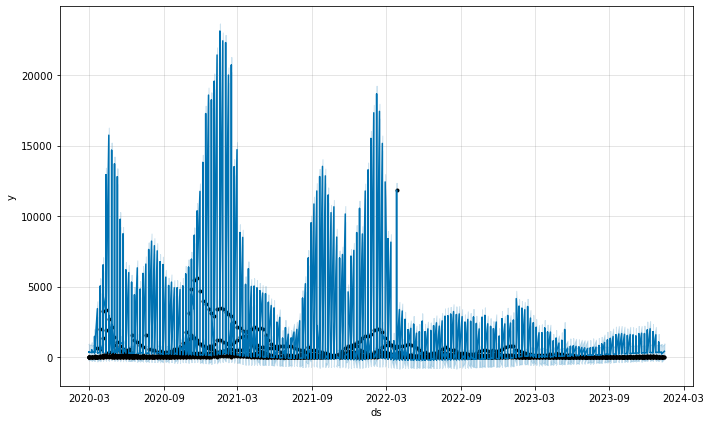

In [94]:
forecast_multivariate = model_multivariate.predict(future_multivariate)

model_multivariate.plot(forecast_multivariate); 

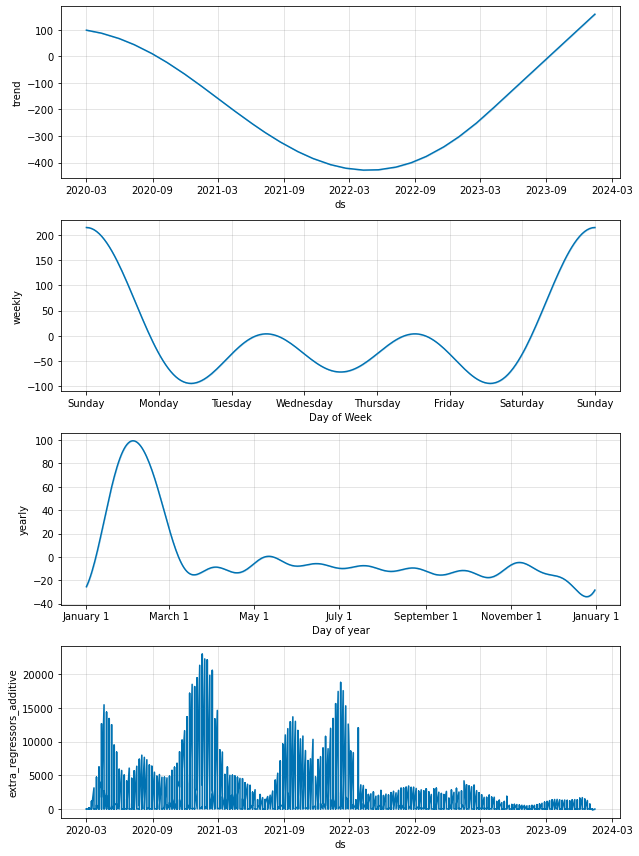

In [95]:
model_multivariate.plot_components(forecast_multivariate);

In [96]:
performance_multivariate = pd.merge(multivar_test, forecast_multivariate[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-606:], on='ds')
mae = mean_absolute_error(performance_multivariate['y'], performance_multivariate['yhat'])
mape = np.mean(np.abs((performance_multivariate['y'] - performance_multivariate['yhat']) / (performance_multivariate['y'] + 1))) * 100
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'All', 'model': 'Multivariate', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# Multivariate Prophet (Event + Holiday)

In [97]:
# COVID time window
events = pd.DataFrame({
    'holiday': 'COVID',
    'ds': pd.to_datetime(['2020-03-15']),
    'lower_window': -15,
    'upper_window': 15,
})

In [98]:
model_holiday = Prophet(yearly_seasonality=True, weekly_seasonality=True, holidays=events)

model_holiday.add_country_holidays(country_name='Belgium')
model_holiday.add_country_holidays(country_name='Chile')
model_holiday.add_country_holidays(country_name='Ireland')
model_holiday.add_country_holidays(country_name='Israel')
model_holiday.add_country_holidays(country_name='Italy')
model_holiday.add_country_holidays(country_name='US')
model_holiday.add_country_holidays(country_name='Czechia')
model_holiday.add_country_holidays(country_name='Estonia')
model_holiday.add_country_holidays(country_name='France')
model_holiday.add_country_holidays(country_name='Malaysia')

model_holiday.add_regressor('new_deaths_2_week_mean', standardize=False)
model_holiday.add_regressor('new_deaths_2_week_max', standardize=False)
model_holiday.add_regressor('new_deaths_2_week_min', standardize=False)
model_holiday.add_regressor('new_deaths_1_week_lag', standardize=False)
model_holiday.add_regressor('new_deaths_4_week_mean', standardize=False)
model_holiday.add_regressor('new_deaths_4_week_max', standardize=False)
model_holiday.add_regressor('new_deaths_4_week_min', standardize=False)
model_holiday.add_regressor('new_deaths_2_week_lag', standardize=False)
model_holiday.add_regressor('new_deaths_4_week_lag', standardize=False)
model_holiday.add_regressor('new_deaths_4_week_std', standardize=False)

model_holiday.fit(multivar_train)

Changing country holidays from 'Belgium' to 'Chile'.
Changing country holidays from 'Chile' to 'Ireland'.
Changing country holidays from 'Ireland' to 'Israel'.
Changing country holidays from 'Israel' to 'Italy'.
Changing country holidays from 'Italy' to 'US'.
Changing country holidays from 'US' to 'Czechia'.
Changing country holidays from 'Czechia' to 'Estonia'.
Changing country holidays from 'Estonia' to 'France'.
Changing country holidays from 'France' to 'Malaysia'.
15:38:34 - cmdstanpy - INFO - Chain [1] start processing
15:38:42 - cmdstanpy - INFO - Chain [1] done processing


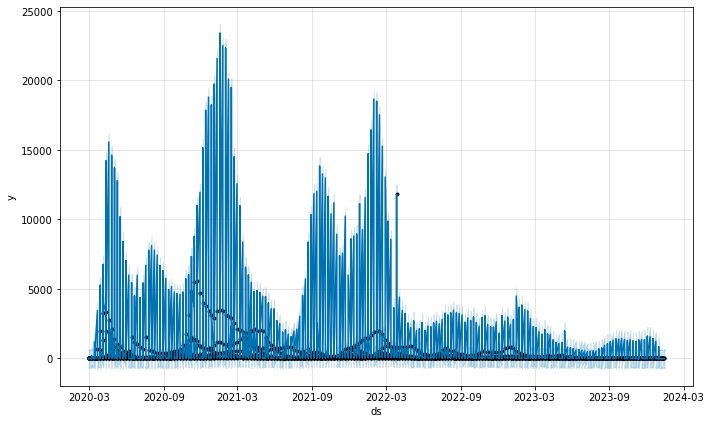

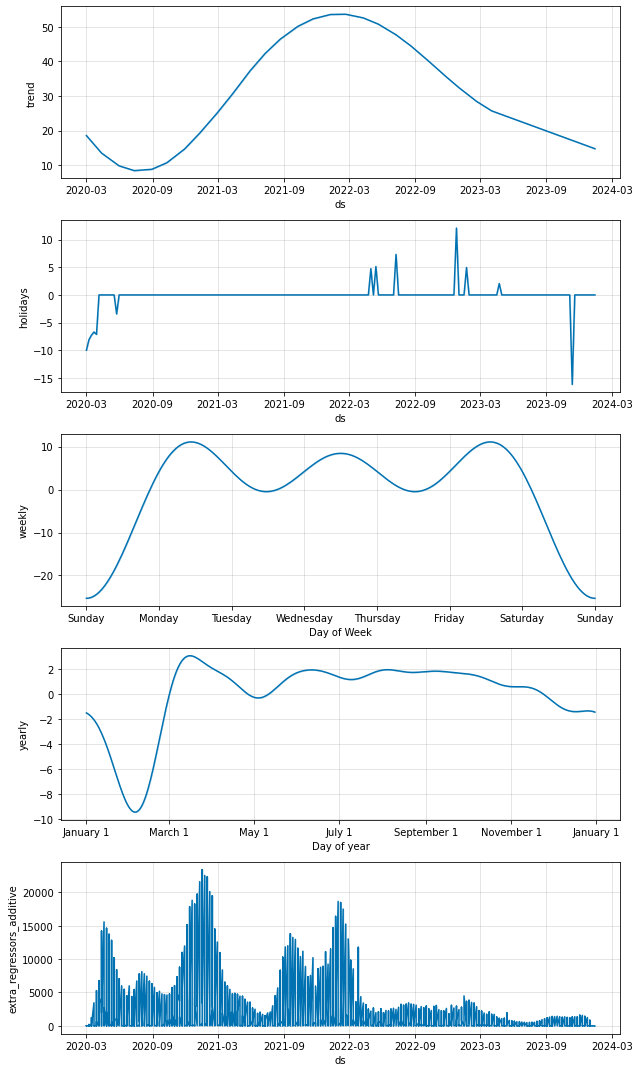

In [99]:
future_holiday = model_holiday.make_future_dataframe(periods=606)

future_holiday = pd.merge(future_holiday, multivar[['ds',
                                                              'new_deaths_2_week_mean',
                                                              'new_deaths_2_week_max',
                                                              'new_deaths_2_week_min',
                                                              'new_deaths_1_week_lag',
                                                              'new_deaths_4_week_mean',
                                                              'new_deaths_4_week_max',
                                                              'new_deaths_4_week_min',
                                                              'new_deaths_2_week_lag',
                                                              'new_deaths_4_week_lag',
                                                              'new_deaths_4_week_std']], on='ds', how='inner')

future_holiday = future_holiday.fillna(method='ffill')
forecast_holiday = model_holiday.predict(future_holiday)
model_holiday.plot(forecast_holiday); 
model_holiday.plot_components(forecast_holiday);

In [100]:
performance_holiday = pd.merge(multivar_test, forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
mae = mean_absolute_error(performance_holiday['y'], performance_holiday['yhat'])
mape = np.mean(np.abs((performance_holiday['y'] - performance_holiday['yhat']) / (performance_holiday['y'] + 1))) * 100
r2 = r2_score(performance_holiday['y'], performance_holiday['yhat'])
new_row = {'country': 'All', 'model': 'Multivariate Holiday', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# Metrics

In [101]:
metrics.sort_values('mape')

,country,model,mae,mape,rsq
4,Ireland,Baseline Prophet,9.897379,17.949173,-0.918408
5,Ireland,Seasonal Prophet,9.797087,18.71986,-0.669052
7,Israel,Seasonal Prophet,20.110051,56.073815,-4.747066
6,Israel,Baseline Prophet,20.694243,57.516448,-5.139804
3,Chile,Seasonal Prophet,125.662982,73.097925,-74.325226
2,Chile,Baseline Prophet,134.413846,78.178517,-82.327945
15,Estonia,Seasonal Prophet,18.044483,146.63614,-15.348355
14,Estonia,Baseline Prophet,20.240433,162.211648,-18.867958
9,Italy,Seasonal Prophet,1195.545144,185.033672,-143.882475
8,Italy,Baseline Prophet,1202.112601,186.040061,-145.378389
